In [28]:
from matplotlib import pyplot as plt
import cv2

mean_img = cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(1))/30.0

for i in range(29):
    print('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(i+2))
    mean_img = mean_img + cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(i+2))/30.0
    



StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0002.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0003.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0004.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0005.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0006.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0007.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0008.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0009.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0010.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0011.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0012.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0013.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0014.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0015.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0016.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0017.PNG
StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-0018.PNG
StackExchange-

In [48]:
# https://stackoverflow.com/questions/35428739/opencv-estimateaffine3d-failes-with-cryptic-error-message 

import numpy as np

# mean_img_bw = cv2.cvtColor(np.int64(mean_img),cv2.COLOR_BGR2GRAY)


im1_gray = cv2.cvtColor(cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(1)), cv2.COLOR_RGB2GRAY)/255.0

im1_32 = im1_gray.astype(np.float32)

im2_gray = cv2.cvtColor(cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(2)), cv2.COLOR_RGB2GRAY)/255.0

im2_32 = im2_gray.astype(np.float32)

warp_matrix = np.eye(3, 3, dtype=np.float32)

# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION

# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_32,im2_32,warp_matrix, warp_mode, criteria)
 
    

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/imgwarp.cpp:2732: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 2 && M0.cols == 3 in function 'warpAffine'


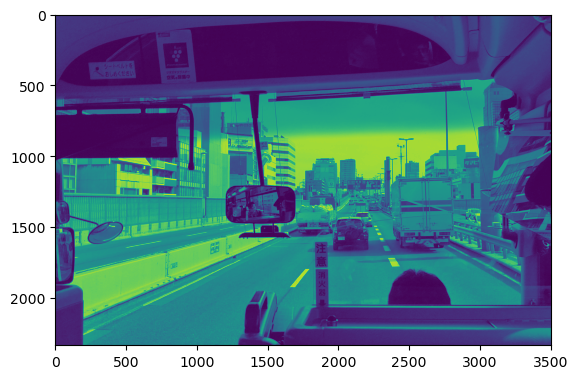

In [38]:
plt.imshow(im1_gray)
plt.show()

In [46]:
np.info(im1_gray)

class:  ndarray
shape:  (2336, 3504)
strides:  (28032, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7f8431a59000
byteorder:  little
byteswap:  False
type: float64


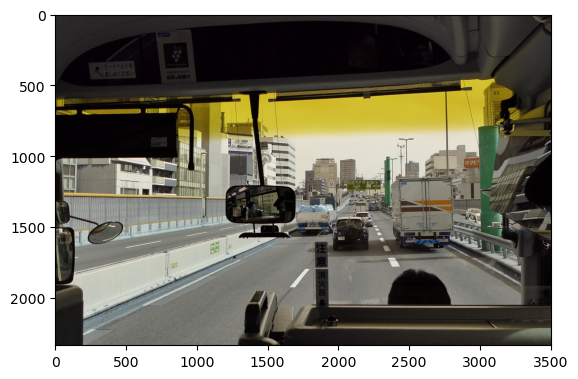

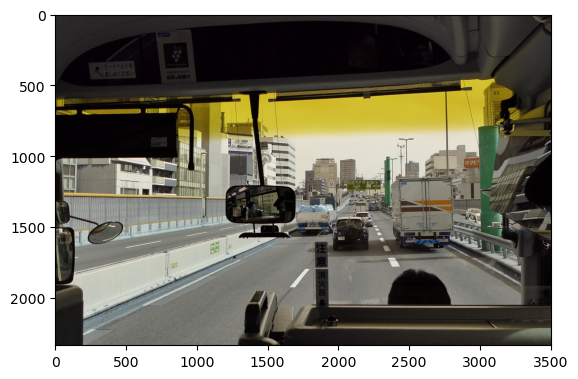

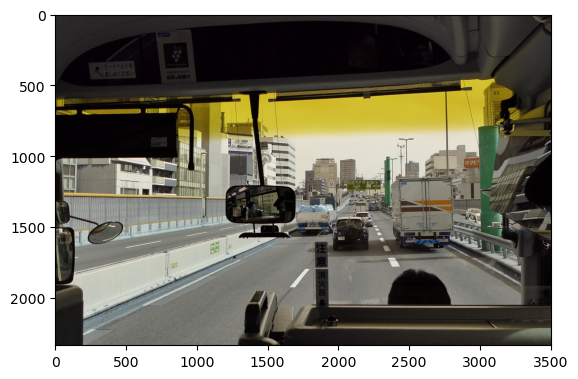

In [54]:
# Read the images to be aligned
im1 =  cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(1));
im2 =  cv2.imread('StackExchange-AVI2JPG/Osaka/P1000014-Japan-Osaka-{:04d}.PNG'.format(1));
 
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 
# Find size of image1
sz = im1.shape
 
# Define the motion model
# warp_mode = cv2.MOTION_TRANSLATION
warp_mode = cv2.MOTION_HOMOGRAPHY
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
# Use warpPerspective for Homography
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
# Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()
plt.imshow(im2_aligned)
plt.show()